## BLINKIT - DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\Aswin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Import Data

In [2]:
data = pd.read_csv(r"Y:\Portfolio-Projects for Upwork\blinkitAnalysis\data\BlinkIT Grocery Data.xlsx.csv")

In [3]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


###  Data summary 

In [4]:
print("Size of data:", data.shape)

Size of data: (8523, 12)


In [5]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [6]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Cleaning

In [8]:
data.duplicated().sum()

0

In [9]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'LF': 'Low Fat',
                                                             'low fat': 'Low Fat',
                                                             'reg':'Regular'})

In [11]:
print(data["Item Fat Content"].unique())

['Regular' 'Low Fat']


### Business Requirements

### KPI's Requirements


In [12]:
# total sales 
total_sales = data['Sales'].sum()
print(f"Total revenue from sales: ${total_sales:,.0f}")

# avg_sales
avg_sales = data['Sales'].mean()
print(f"Average sales: ${avg_sales:,.0f}")

# No.of items sold
no_of_items_sold = data['Item Identifier'].count()
print(f"No. of items sold: {no_of_items_sold:,.0f}")

# Average Rating
avg_rating = data['Rating'].mean()
print(f"Average Rating: {avg_rating:,.1f}")

Total revenue from sales: $1,201,681
Average sales: $141
No. of items sold: 8,523
Average Rating: 4.0


### Chart Requirements

#### Total Sales by Fat Content

In [13]:
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum()

In [14]:
sales_by_fat

Item Fat Content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64

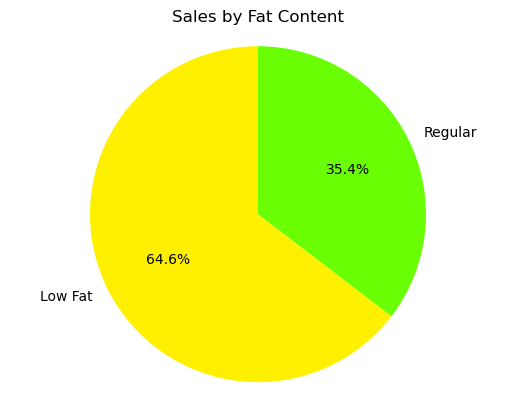

In [15]:
plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct= '%.1f%%',
        startangle = 90,
        colors = ['#FFF000', '#6AFF05']
         )
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### The majority of sales come from Low Fat products, contributing to 64.6% of total sales, while Regular fat items account for only 35.4%.
#### This suggests a strong consumer preference for healthier, low-fat options, indicating Blinkit should consider expanding its low-fat product range to align with customer demand.

### Total sales by Item Type

In [16]:
sales_by_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

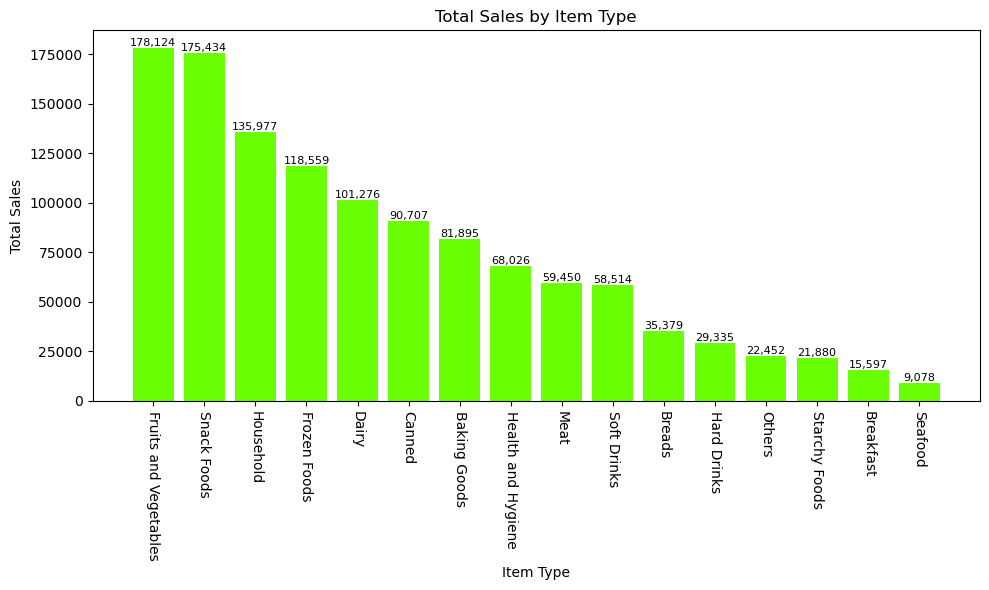

In [17]:
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values, color = '#6AFF05')

plt.xticks(rotation = -90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{bar.get_height():,.0f}',ha= 'center', va = 'bottom', fontsize = 8)
plt.tight_layout()
plt.show()

#### Fruits and Vegetables and Snack Foods are the top-selling categories, each generating over 175,000 in sales, followed by Household and Frozen Foods. On the lower end, categories like Seafood, Breakfast, and Starchy Foods have minimal sales contribution.
#### This highlights where Blinkit's strengths lie and suggests opportunities to optimize inventory or promote underperforming categories.

### Fat Content by Outlet for Total Sales


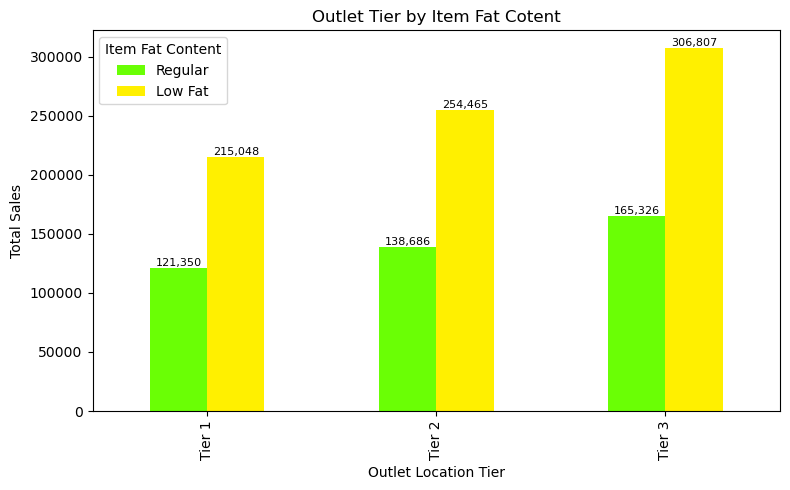

In [18]:
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']] 

ax = grouped.plot(kind = 'bar', figsize= (8,5),title = "Outlet Tier by Item Fat Cotent",color=['#6AFF05', '#FFF000'])
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title ='Item Fat Content')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                height,
                f'{height:,.0f}',
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()



#### Across all outlet tiers (Tier 1, 2, and 3), Low Fat items consistently outperform Regular items in total sales. Notably, Tier 3 outlets generate the highest sales, with over 306,000 in Low Fat product revenue, indicating strong demand in emerging or smaller cities.
#### This suggests that Blinkit should consider prioritizing Low Fat inventory, especially in Tier 3 regions, where health-conscious products seem to have a larger market.

###  Total sales by outlet Establishment 

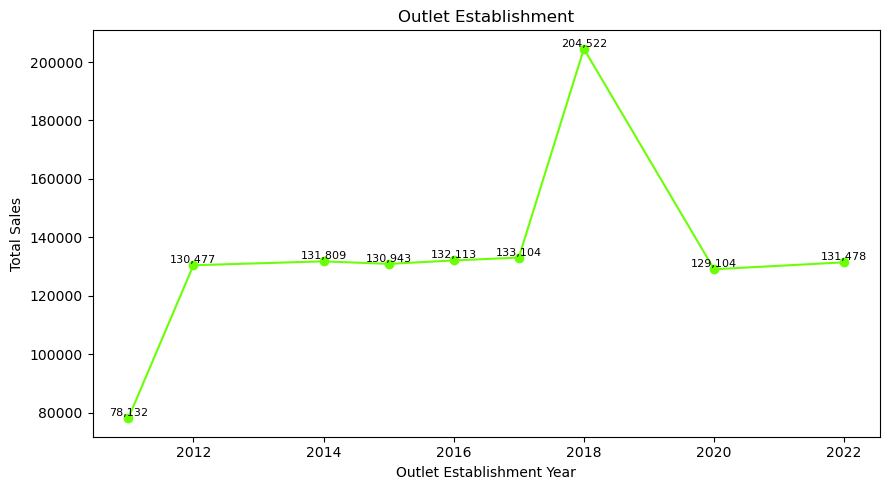

In [22]:
sales_by_year = data.groupby("Outlet Establishment Year")['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'o', linestyle = '-',color='#6AFF05')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha='center', va='bottom', fontsize = 8)

plt.tight_layout()
plt.show()

#### Outlets established in 2018 recorded the highest total sales (204,522), significantly outperforming outlets from other years. Sales from outlets established between 2013 and 2022 remained relatively stable around 130,000, whereas those from 2011 had the lowest sales (78,132).

#### This indicates that newer outlets don't necessarily perform better; rather, 2018 outlets may have been established in high-demand areas or managed more effectively. It would be valuable to study the 2018 outlets further to replicate their success.

### sales by Outlet size 

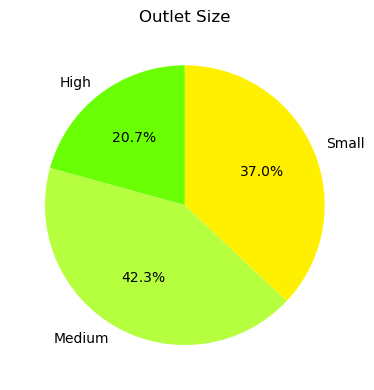

In [20]:
sales_by_size = data.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%',startangle=90,colors=['#6AFF05',  '#B5FF3F','#FFF000'])
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Medium-sized outlets contribute the highest to total sales, accounting for 42.3%. Small outlets follow with 37.0% of total sales. High-sized outlets contribute the least, with only 20.7% of sales.

#### This indicates that medium-sized outlets are the most commercially effective, possibly due to their balance between reach and operational efficiency. Surprisingly, high-sized outlets are underperforming in terms of sales, suggesting potential issues with scalability or customer footfall.

### Sales by outlet Location 

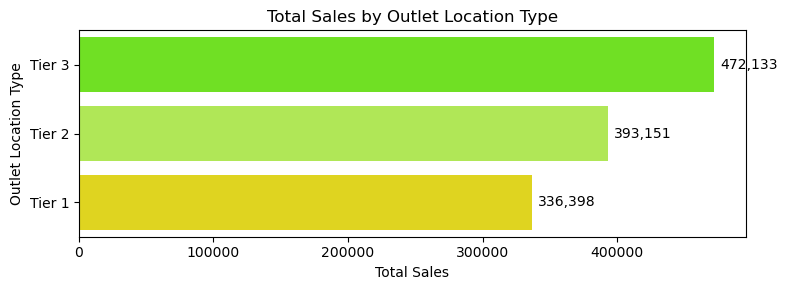

In [27]:
sales_by_location = data.groupby("Outlet Location Type")['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending = False)
colors =['#6AFF05',  '#B5FF3F','#FFF000']
plt.figure(figsize = (8,3))
ax= sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_location,palette=colors)
#loop for value
for i, v in enumerate(sales_by_location['Sales']):
    ax.text(v + max(sales_by_location['Sales']) * 0.01, i, f"{v:,.0f}", color='black', va='center')

plt.title("Total Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel('Outlet Location Type')

plt.tight_layout() 
plt.show()

#### Tier 3 outlets generate the highest sales compared to other location types**. This suggests that the demand or customer base in Tier 3 locations is strong, potentially due to less competition or higher market penetration in these areas.


